In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [77]:
file_path = 'results_mini_nsga.csv'
nsga_data = pd.read_csv(file_path)

# Filtering out rows where latency or energy is infinity
nsga_data = nsga_data[(nsga_data['latency'] != float('inf')) & (nsga_data['energy'] != float('inf'))]

# Filter for generation 200 and alpha = 0.5 and beta = 0.5
nsga_data = nsga_data[(nsga_data['generations'] == 200) & (nsga_data['alpha'] == 0.5)].copy()

In [78]:
file_path = 'results_mini_bf.csv'
bf_data = pd.read_csv(file_path)

# Filtering out rows where latency or energy is infinity
bf_data = bf_data[(bf_data['latency'] != float('inf')) & (bf_data['energy'] != float('inf'))]

In [79]:
# Merging the three dataframes on the 'config' column
combined_data = pd.merge(nsga_data[['config', 'latency', 'energy']],
                         bf_data[['config', 'latency', 'energy']],
                         on=['config'], suffixes=('', '_bf'))

combined_data['obj_function'] = combined_data['latency'] * 0.5 + combined_data['energy'] * 0.5
combined_data['obj_function_bf'] = combined_data['latency_bf'] * 0.5 + combined_data['energy_bf'] * 0.5

filtered = combined_data[(combined_data['obj_function'] < combined_data['obj_function_bf'])].copy()
filtered

,config,latency,energy,latency_bf,energy_bf,obj_function,obj_function_bf
0,config-1,14506.232895,6051.468896,13866.059893,7427.949544,10278.850896,10647.004719
1,config-2,15983.121530,2467.408501,15021.618509,5338.369123,9225.265016,10179.993816
3,config-4,19468.965306,3882.610746,19787.361787,4438.253909,11675.788026,12112.807848
4,config-5,23790.206603,4412.902258,25679.213260,3900.485733,14101.554431,14789.849497
6,config-7,28292.870448,11720.252547,28142.508201,15844.897596,20006.561497,21993.702899
7,config-8,18717.306912,3988.055014,18636.409566,5087.086225,11352.680963,11861.747895
8,config-9,15088.990750,3283.209511,14926.903582,3514.872341,9186.100131,9220.887962
11,config-12,9247.065310,1922.266607,9271.447454,1992.477639,5584.665959,5631.962547
13,config-14,17060.387137,7179.319856,17454.604145,9195.346773,12119.853497,13324.975459
14,config-15,17951.775381,3967.021097,18003.253701,4735.859181,10959.398239,11369.556441


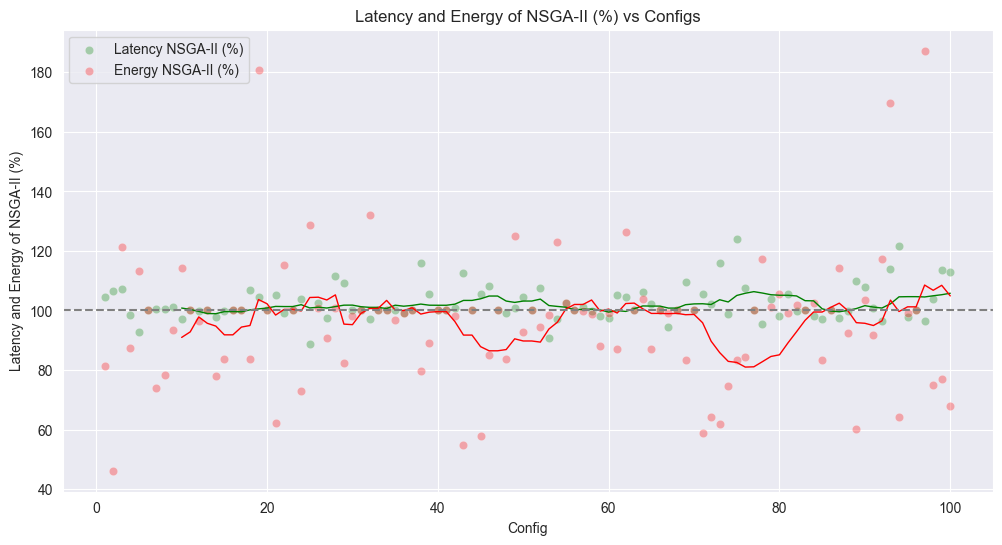

In [80]:
# Calculating latency and energy as a percentage of latency
combined_data['latency_nsga_percent'] = (combined_data['latency'] / combined_data['latency_bf']) * 100
combined_data['energy_nsga_percent'] = (combined_data['energy'] / combined_data['energy_bf']) * 100

# Extracting config number from the 'config' column
combined_data['config_number'] = combined_data['config'].str.extract('(\d+)').astype(int)

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='config_number', y='latency_nsga_percent', data=combined_data, label='Latency NSGA-II (%)', color='green', alpha=0.3)
sns.scatterplot(x='config_number', y='energy_nsga_percent', data=combined_data, label='Energy NSGA-II (%)', color='red', alpha=0.3)

# Drawing a moving average line through the scatter points
window_size = 10
sns.lineplot(x='config_number', y=combined_data['latency_nsga_percent'].rolling(window=window_size).mean(), data=combined_data, color='green', lw=1)
sns.lineplot(x='config_number', y=combined_data['energy_nsga_percent'].rolling(window=window_size).mean(), data=combined_data, color='red', lw=1)

plt.axhline(100, color='gray', linestyle='--')

plt.title('Latency and Energy of NSGA-II (%) vs Configs')
plt.xlabel('Config')
plt.ylabel('Latency and Energy of NSGA-II (%)')
plt.legend()
plt.show()

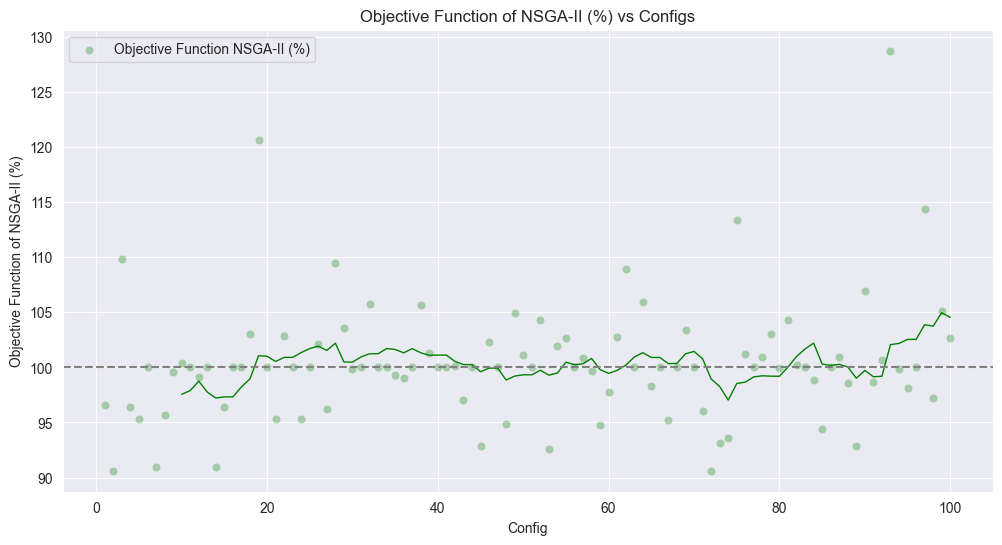

In [81]:
# Calculating objective fundtion as a percentage of brute force objective function
combined_data['obj_function_percentage'] = (combined_data['obj_function'] / combined_data['obj_function_bf']) * 100

# Creating the line plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='config_number', y='obj_function_percentage', data=combined_data, label='Objective Function NSGA-II (%)', color='green', alpha=0.3)

# Drawing a moving average line through the scatter points
window_size = 10
sns.lineplot(x='config_number', y=combined_data['obj_function_percentage'].rolling(window=window_size).mean(), data=combined_data, color='green', lw=1)

plt.axhline(100, color='gray', linestyle='--')

plt.title('Objective Function of NSGA-II (%) vs Configs')
plt.xlabel('Config')
plt.ylabel('Objective Function of NSGA-II (%)')
plt.legend()
plt.show()